In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

Dataset Overview:


*   The guest_data_with_reviews.xlsx dataset contains customer feedback from a hospitality business.
*   Key columns include:
How likely are you to recommend us to a friend or colleague? for Net Promoter Score (NPS) calculations.
Review for textual feedback, useful for sentiment analysis and topic modeling.




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel("/content/guest_data_with_reviews.xlsx")

In [4]:
df.head()

,ID,Start time,Completion time,Email,Name,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,...,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review
0,1,NaN,NaN,NaN,NaN,Guest 00001,Male,1993-10-02,2022-04-07,Business,...,9,Good,Good,Very good,Poor,Very good,Average,Excellent,Excellent,it was an okay experience overall. the room wa...
1,3,NaN,NaN,NaN,NaN,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,...,4,Poor,Good,Very good,Average,Poor,Poor,Good,Very good,the stay was memorable thanks to the poor staf...
2,4,NaN,NaN,NaN,NaN,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,...,6,Good,Very good,Good,Poor,Average,Poor,Poor,Excellent,while the staff were good and did their best t...
3,5,NaN,NaN,NaN,NaN,Guest 00005,Male,1961-08-08,2022-06-24,Business,...,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,Good,the hotel experience was average at best. the ...
4,8,NaN,NaN,NaN,NaN,Guest 00008,Male,1981-11-27,2020-02-01,Business,...,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,Very good,"not my favorite stay, but the good staff helpe..."


In [ ]:
#we can see some columns might have missing value. we are looking for calculating the NPS score.

In [ ]:
# How many rows  in the dataset
total_len=len(df)
total_len

1108

In [ ]:
#Missing value
missing_values = df.isnull().sum()
print(missing_values)

ID                                                                 0
Start time                                                      1108
Completion time                                                 1108
Email                                                           1108
Name                                                            1108
Full Name                                                          0
Gender                                                             0
Date of Birth                                                      0
Checkout Date                                                      0
Purpose of the visit                                               0
How did you discover us?                                           0
Rate your overall experience in our hotel                          0
How likely are you to recommend us to a friend or colleague?       0
Staff attitude                                                     0
Check-in Process                  

In [ ]:
#we can see Start time,Completion time, Name, Email, Full Name >> we dont have any value. we assume that is fine bcz we have to undersatnd the review of the customers


Missing Value Treatement


In [ ]:
#We have 1 miising value in the Gym indicator#
# here will not use dropna()>> bcz kit will completely detele missing rows in any of the columns

In [6]:
#1st drop the column and then rows with missing value.
df_cleaned= df.dropna(axis=1)
df_cleaned

,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Review
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,it was an okay experience overall. the room wa...
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,the stay was memorable thanks to the poor staf...
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,while the staff were good and did their best t...
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,the hotel experience was average at best. the ...
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,"not my favorite stay, but the good staff helpe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1942,Guest 01942,Male,2006-09-17,2022-10-07,Vacation,hotel booking sites,3,8,Excellent,Very good,Good,Good,Very good,Average,Poor,i was pleasantly surprised by how excellent th...
1104,1945,Guest 01945,Male,1971-12-11,2021-05-12,Function,hotel booking sites,4,7,Poor,Average,Good,Very good,Good,Very good,Good,the hotel experience was average at best. the ...
1105,1946,Guest 01946,Male,1967-01-16,2020-09-10,Other,Word of mouth,4,3,Very good,Very good,Average,Poor,Good,Average,Good,this stay was a mix of good and bad. the staff...
1106,1947,Guest 01947,Male,2003-06-17,2022-11-17,Vacation,hotel booking sites,4,8,Good,Excellent,Good,Good,Poor,Average,Good,there’s room for improvement here. while the s...


Key Concepts:
Net Promoter Score (NPS): Measures customer loyalty.
Scores:
*   9–10: Promoters
*   7–8: Passives
*   0–6: Detractors

Formula: NPS = percentage of promoters - percentage of detractors
*   Sentiment Analysis: Identifies the emotional tone (positive, negative, or neutral) in reviews.


*   Topic Modeling: Uses embeddings to identify recurring themes in text data.





In [7]:
#How likely are you recommend us?
likelyhood= px.histogram(df_cleaned, x="How likely are you to recommend us to a friend or colleague?",nbins=10,title="Distribution of Recommmendation Score" )

In [8]:
likelyhood.show()

In [9]:
#calculate NPS score:

In [10]:
#classify score Promoter(9-10), passive (7-8), Detractor(0-6)

#We have to create a function to define the NPs score:

In [11]:
def classify_NPS(Score):
  if Score>=9:
    return 'Promoters'
  elif Score>=7:
    return 'Passive'
  else:
    return 'Detractor'

In [12]:
#Apply the classification on the recommendation score

df_cleaned['NPS Score']=df_cleaned["How likely are you to recommend us to a friend or colleague?"].apply(classify_NPS)

df_cleaned

<ipython-input-12-c84b93280c00>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Review,NPS Score
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,it was an okay experience overall. the room wa...,Promoters
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,the stay was memorable thanks to the poor staf...,Detractor
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,while the staff were good and did their best t...,Detractor
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,the hotel experience was average at best. the ...,Detractor
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,"not my favorite stay, but the good staff helpe...",Passive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1942,Guest 01942,Male,2006-09-17,2022-10-07,Vacation,hotel booking sites,3,8,Excellent,Very good,Good,Good,Very good,Average,Poor,i was pleasantly surprised by how excellent th...,Passive
1104,1945,Guest 01945,Male,1971-12-11,2021-05-12,Function,hotel booking sites,4,7,Poor,Average,Good,Very good,Good,Very good,Good,the hotel experience was average at best. the ...,Passive
1105,1946,Guest 01946,Male,1967-01-16,2020-09-10,Other,Word of mouth,4,3,Very good,Very good,Average,Poor,Good,Average,Good,this stay was a mix of good and bad. the staff...,Detractor
1106,1947,Guest 01947,Male,2003-06-17,2022-11-17,Vacation,hotel booking sites,4,8,Good,Excellent,Good,Good,Poor,Average,Good,there’s room for improvement here. while the s...,Passive


In [13]:
#Ratio of Promoters, Dectractor and Passive
NPS_proportions= df_cleaned["NPS Score"].value_counts(normalize=True)*100
NPS_proportions

,proportion
NPS Score,
Passive,47.202166
Detractor,36.913357
Promoters,15.884477


In [14]:
#As Larger num of Promoters than Dectractors. So, we can say more negative number of feedback.Business is not going vwey well.

In [15]:
#Interprate and claculate the overall NPS
Promoters=df_cleaned[df_cleaned["NPS Score"]=="Promoters"].shape[0]
Detractors=df_cleaned[df_cleaned["NPS Score"]=="Detractor"].shape[0]
Passive=df_cleaned[df_cleaned["NPS Score"]=="Passive"].shape[0]
Total_response=df_cleaned.shape[0]

In [16]:
Promoters, Detractors, Passive, Total_response

(176, 409, 523, 1108)

In [17]:
nps_score=((Promoters-Detractors)/Total_response)*100
nps_score

-21.028880866425993

In [18]:
if nps_score>0:
  nps_interpretation="Positive"
elif nps_score<0:
  nps_interpretation="Negative"
else:
  nps_interpretation="Neutral"


In [19]:
nps_score,nps_interpretation

(-21.028880866425993, 'Negative')

In [20]:
# What does NPS value indicate about customer loyalty?
if nps_score>50:
  loyalty_interpretation="Excellent customer loyalty"
elif 0 <nps_score<=50:
  loyalty_interpretation="Good customer loyalty"
else:
  loyalty_interpretation="very poor customer loyalty"

In [21]:
nps_score,nps_interpretation, loyalty_interpretation

(-21.028880866425993, 'Negative', 'very poor customer loyalty')

In [22]:
#Sentiment Analysis

from transformers import pipeline

In [23]:
sentiment_analzer = pipeline("sentiment-analysis")

#Extracts the first prediction ([0]) and gets its sentiment label (['label']).
df_cleaned['sentiment']=df_cleaned['Review'].apply(lambda review:sentiment_analzer(review)[0]['label'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-23-cc57db3347c5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cleaned[['Review','sentiment']]

,Review,sentiment
0,it was an okay experience overall. the room wa...,POSITIVE
1,the stay was memorable thanks to the poor staf...,NEGATIVE
2,while the staff were good and did their best t...,NEGATIVE
3,the hotel experience was average at best. the ...,NEGATIVE
4,"not my favorite stay, but the good staff helpe...",POSITIVE
...,...,...
1103,i was pleasantly surprised by how excellent th...,NEGATIVE
1104,the hotel experience was average at best. the ...,NEGATIVE
1105,this stay was a mix of good and bad. the staff...,NEGATIVE
1106,there’s room for improvement here. while the s...,NEGATIVE


In [ ]:
#Visualize sentiment analysis accross the distribution:

fig= px.histogram(df_cleaned,x="sentiment",
                 title= "Sentiment analysis accross the dataset")

In [ ]:
fig.show()

In [ ]:
sentiment_count=df_cleaned['sentiment'].value_counts()
sentiment_percentage=(df_cleaned['sentiment'].value_counts())/len(df_cleaned)*100

In [ ]:
sentiment_percentage

,count
sentiment,
NEGATIVE,74.819495
POSITIVE,25.180505


In [ ]:
#prepare a dataframe to show :

sentiment_df = pd.DataFrame({'Sentiment': sentiment_count.index,
                             'count': sentiment_count.values,
                             'percentage': sentiment_percentage.values})

In [ ]:
sentiment_df

,Sentiment,count,percentage
0,NEGATIVE,829,74.819495
1,POSITIVE,279,25.180505


In [ ]:
#what are the common keywords in the review:
#CountVectorizer >>help to count

from sklearn.feature_extraction.text import CountVectorizer
Review= df_cleaned['Review']

vectorizer= CountVectorizer(stop_words='english', max_features=20)

#Fit the data:

X= vectorizer.fit_transform(Review)

get_vocab= vectorizer.get_feature_names_out()

word_count=X.toarray().sum(axis=0)

NameError: name 'df_cleaned' is not defined

In [ ]:
#create a dataframe with word and count

keywords_df= pd.DataFrame({
    'keyword': get_vocab,
    'count': word_count
}).sort_values(by='count', ascending= False)

NameError: name 'get_vocab' is not defined

In [25]:
keywords_df

,keyword,count
15,room,1108
8,food,1003
9,good,997
16,staff,897
17,stay,457
7,experience,454
3,cleanliness,403
2,best,314
5,excellent,307
19,wasn,306


TF-IDF vectorization and Non-negative Matrix Factorization (NMF) help
to extract key topics


*   TfidfVectorizer: Converts text data into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features
*    NMF: A machine learning technique used for topic modeling (identifying hidden topics in text).


*  n_components=5: The model will extract 5 topics.
*   Trains the NMF model on the TF-IDF matrix to identify 5 topics based on word distributions.

*   Returns a matrix where each row represents a topic, and each column represents the importance of a word in that topic.
*   List item








In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [49]:
#using emedding extract key topics
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the reviews
tfidf = tfidf_vectorizer.fit_transform(Review)

#Initialize the NMF Model

nmf=NMF(n_components=5, random_state=42)

#Fit the NMF
nmf.fit(tfidf)

#get the topic

topic=nmf.components_

#Get the feature names(Words)
feature_names=tfidf_vectorizer.get_feature_names_out()

#Dispaly the top words for each topic
num_topword=10
topics_df=pd.DataFrame()

for topic_idx, topic in enumerate(topic):
  top_word=[feature_names[i] for i in topic.argsort()[:-num_topword -1:-1]]
  topics_df[f'Topic{topic_idx+1}'] = top_word
topics_df

,Topic1,Topic2,Topic3,Topic4,Topic5
0,expectations,upgrades,overall,best,wasn
1,cleanliness,consider,work,experience,good
2,memorable,helped,tried,dining,impression
3,match,need,make,improved,liked
4,thanks,returning,okay,worst,pleasantly
5,unfortunately,significant,use,did,surprised
6,quality,favorite,approach,assist,leave
7,didn,stay,bit,hope,clean
8,stay,staff,experience,hotel,quite
9,staff,food,good,future,left


In [50]:
# Visualize results as a word cloud

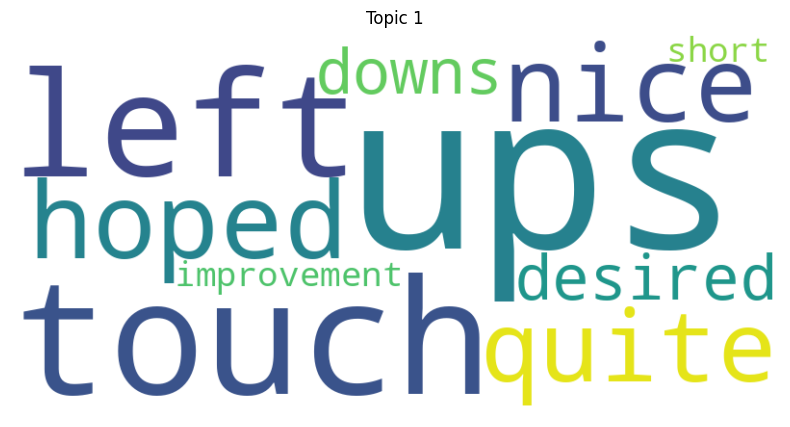

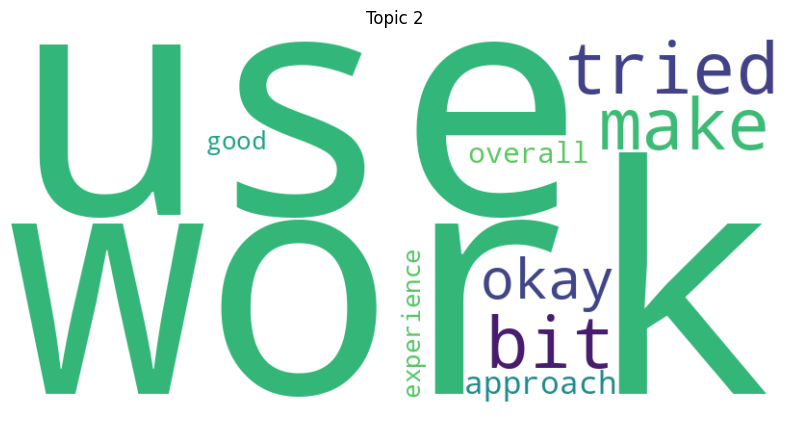

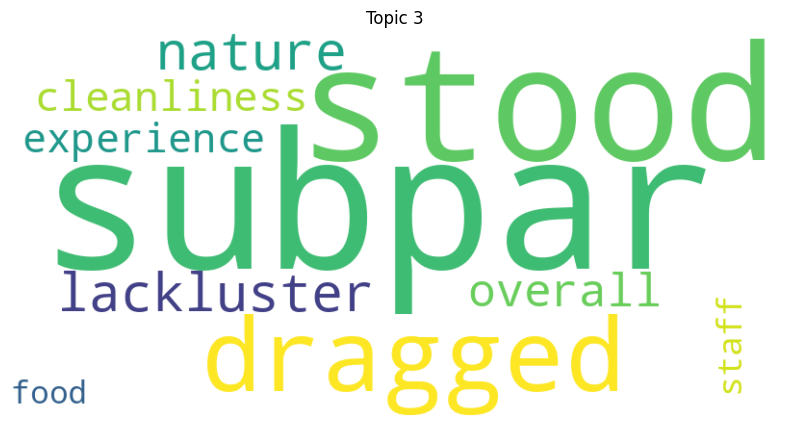

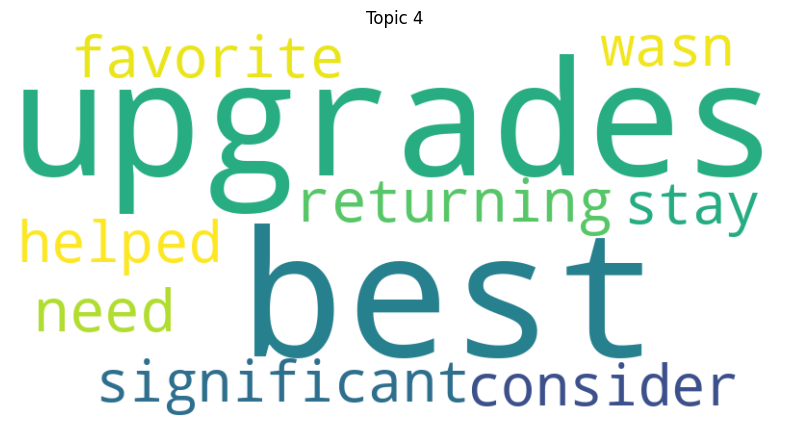

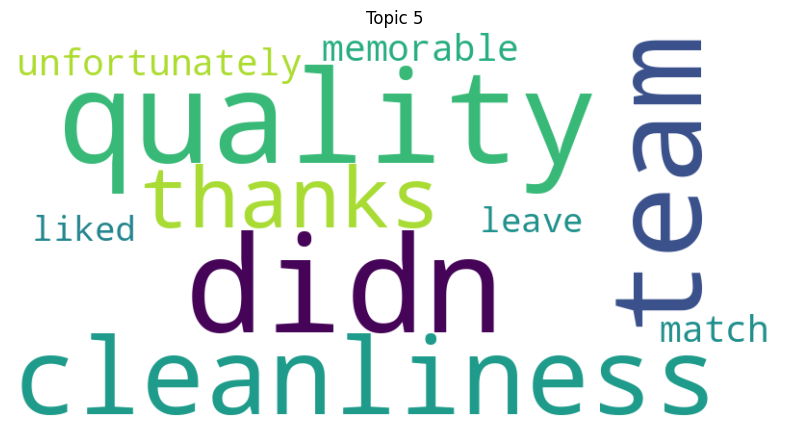

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word cloud for each topic
def plot_word_cloud(lda_model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx+1}')
        plt.show()

# Plot word clouds for each topic
plot_word_cloud(lda, tfidf_feature_names, no_top_words)

In [ ]:
#Its group the review based on topic

#bigger the size of the word may be more important
Probably cleaniness and food that may be big issue.


In [ ]:
################################# To be continue ################